<font size ="8"> <div align="center">**Creating a Music Recommendation System**</div></font>
<font size ="5"> <div align="center">By **Jon Nyner Gavan**</div></font>

--------------------
# **Context of the Project (Spotify Music)**
--------------------
<p align = "justify">
With the advent of technology, societies have become more efficient with their lives. But at the same time, individual human lives have become much more fast-paced and distracted, leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. It has made it easier for humans with a shortage of time to find and consume good content. Therefore, one of the key challenges for the companies is to be able to figure out what kind of content their customers are most likely to consume. Almost every internet-based company's revenue relies on the time consumers spend on their platforms. These companies need to be able to figure out what kind of content is needed to increase the time spent by customers on their platform and make their experience better.

<p align = "justify">
Spotify is one such audio content provider that has got a huge market base across the world. It has grown significantly because of its ability to recommend the ‘best’ next song to each and every customer based on the huge preference database they have gathered over time like millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on the users’ likes/dislikes


-------------------------
## **Data Description**
-------------------------
<p align = "justify">
The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**
* **`song_id`** - A unique id given to every song

* **`title`** - Title of the song

* **`Release`** - Name of the released album

* **`Artist_name`** - Name of the artist

* **`year`** - Year of release

**count_data**
* **`user_id`** - A unique id given to the user

* **`song_id`** - A unique id given to the song

* **`play_count`** - Number of times the song was played

**Data Source**
- http://millionsongdataset.com/

------------------
## **Objective of the Study**
-----------------
The main goal of this work is to recommend songs to a user based on their likelihood of liking those songs.

By answering the following questions;
- What are all songs they have listened to?
- What are the most favored songs and artists?

It is expected to build a recommendation system that can propose the top 10 songs for a user based on the likelihood of listening to those songs.


**Installing surprise library**

### **Importing the necessary libraries and overview of the dataset**

**Importing the necessary libraries**

In [ ]:
# installing the surprise library
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156234 sha256=d03d09889f96808b2cfb7a4a4475356c22105713781b7ec328f6f8b5552c9b3f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

**Loading the Data and taking a quick look**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
count_df = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/7 Recommendation Systems/1 Practice Case Studies/Dataset - Count Data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science/MIT Summer School/7 Recommendation Systems/1 Practice Case Studies/Dataset - Song Data.csv')

In [ ]:
# Looking at the top ten records of the coun_data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Looking at the top ten records of the song_data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Checking the data types and and missing values of each column**

In [ ]:
# Let's check the info of the data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Let's check the info of the data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


- The **`count_df`** dataframe contains **`user_id`, `song_id`,** and the **number of times a particular song has been played by a particular user**. There are **4 columns** and **20,000,000 observations** in the dataset.
- The **unnamed: 0** column seems like the index of the dataframe. We can drop this column.
- The song_df data has information/features of the song - **`title`**, **`released album`**, **`artist name`** , **`year of release`**. There are **5 columns** and **10,000,00 observations** in the dataset.

### **Data Preprocessing**

In [ ]:
# Joining/merging the count_df anf song_df to better understand the user prefrences
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Providing Anonymity to users and songs**

In [ ]:
# Using Label encoding to encrypt song_id and user_id for providing anonymity
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

**Data Reduction based on Logical Assumptions**
* As this dataset is very large and has 2000000 observations, it is not computationally possible to build a model using this. Moreover, many users have only listened a few songs and also some songs are heard by very few users

In [ ]:
# taking users who have listened at least 90 songs

# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs

RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Taking the songs that are listened by at least 120 users

# Get the column containing the song ids
items = df.song_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for item in items:
    # If we already have the user, just add 1 to their rating count
    if item in ratings_count:
        ratings_count[item] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[item] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred

RATINGS_CUTOFF = 120
remove_items = []
for item, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_items.append(item)
df_final= df.loc[~df.song_id.isin(remove_items)]

In [ ]:
# Only considering the songs wiht play_count less than or equal to 5
df_final=df_final[df_final.play_count<=5]
df_final

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [ ]:
# Looking at the number of entries for songs that have been played different number of times
df_final.groupby("play_count").count()

,user_id,song_id,title,release,artist_name,year
play_count,,,,,,
1,72473,72473,72473,72473,72473,72473
2,23890,23890,23890,23890,23890,23890
3,10774,10774,10774,10774,10774,10774
4,5874,5874,5874,5874,5874,5874
5,4865,4865,4865,4865,4865,4865


In [ ]:
# See the shape of the data
df_final.shape

(117876, 7)

### **Exploratory Data Analysis**

**Checking the total number of unique users, songs, artists in the data**

In [ ]:
# Total number of unique users
df_final['user_id'].nunique()

3155

In [ ]:
# Total number of unique songs
df_final['song_id'].nunique()

563

In [ ]:
# Total number of unique artists
df_final['artist_name'].nunique()

232

- There are **3155 unique users**, **563 unique songs**, and **232 artists** in the final dataset.

**Checking the most interacted songs and interacted users**

In [ ]:
# looking at Most interacted songs
df_final['title'].value_counts()

Use Somebody                       751
Dog Days Are Over (Radio Edit)     748
Sehr kosmisch                      713
Clocks                             662
The Scientist                      652
                                  ... 
Who's Real                         103
Brave The Elements                 102
Creil City                         101
Heaven Must Be Missing An Angel     97
The Big Gundown                     96
Name: title, Length: 561, dtype: int64

In [ ]:
# Looking at Most interacted users
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

- The song **'Use somebody'** has been played the most number of times.
- The user with **ID 61472** is the most interacted user.

In [ ]:
# Looking at the number of songs played in each year

count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


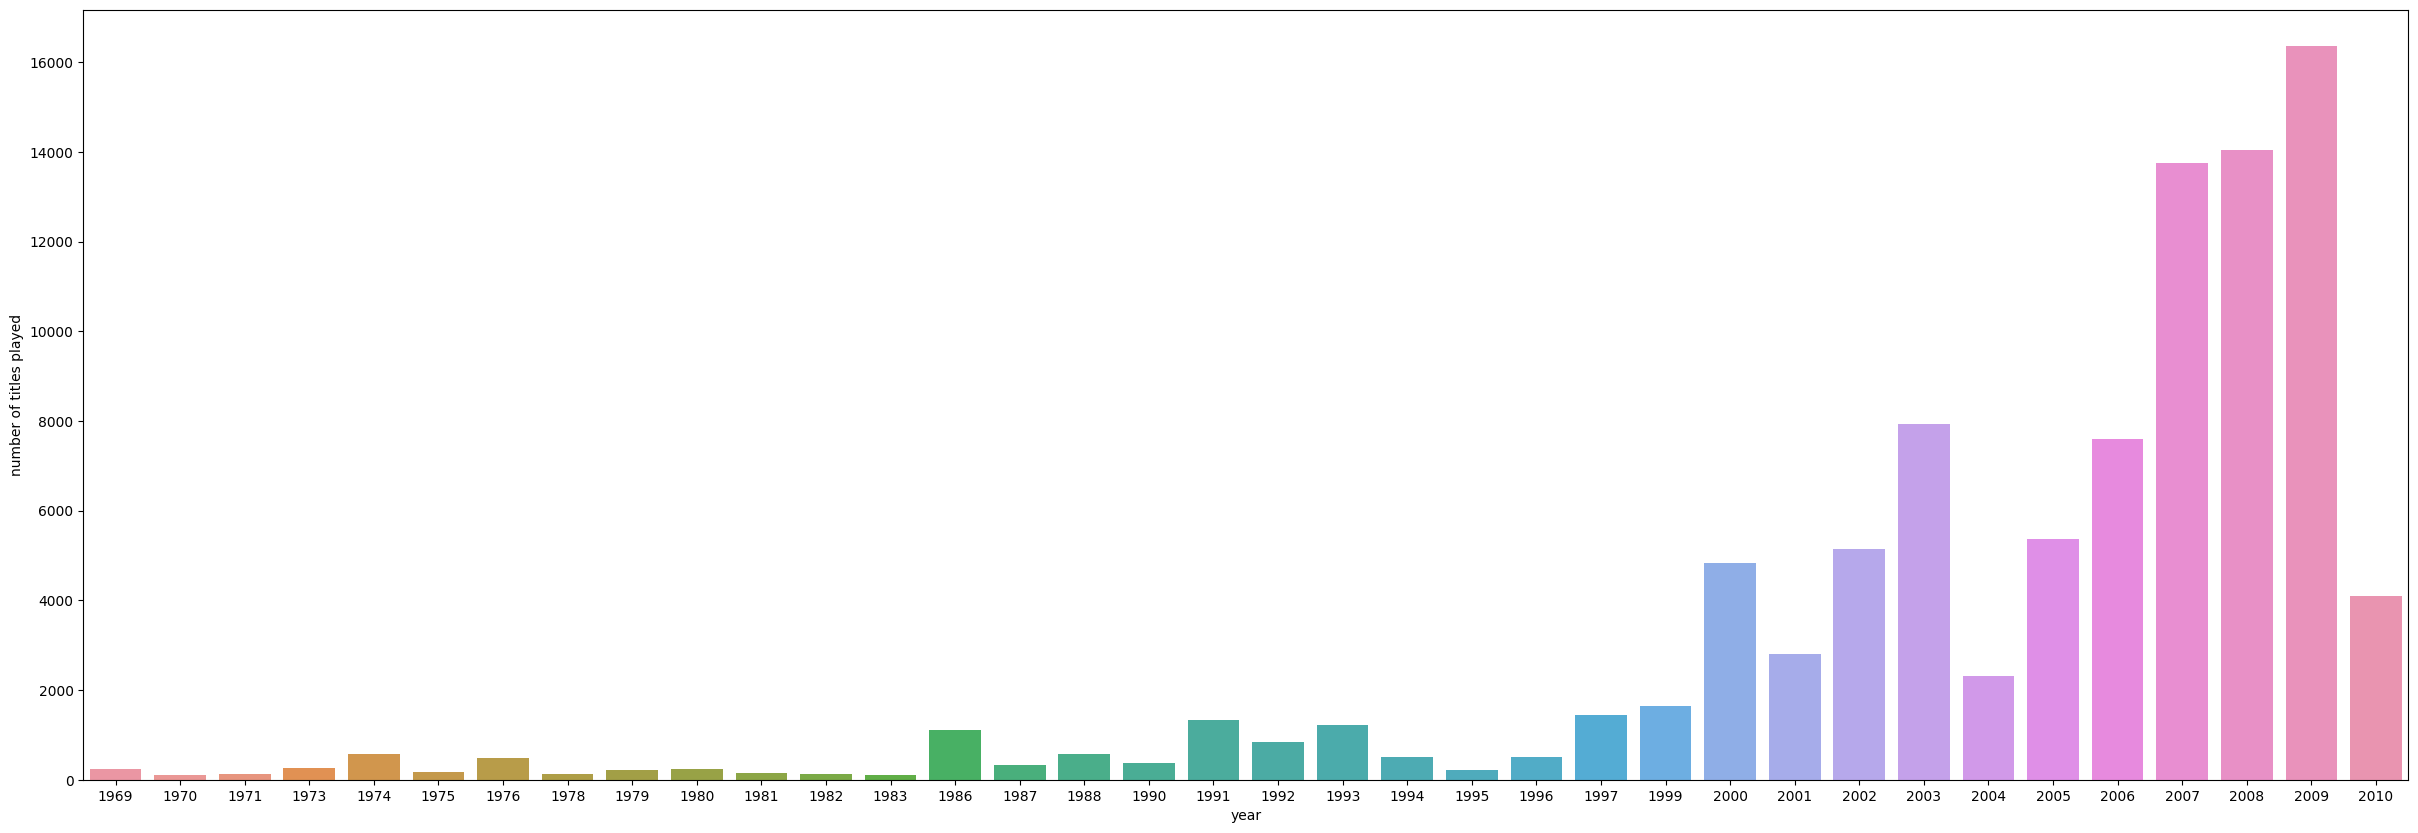

In [ ]:
# Generating a barplot of the number of songs played across the years
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played')
# Show the plot
plt.show()

- We can observe that the number of songs released in a year has been increasing over the years.
- As per the data, the **highest** number of songs was released in **2009** i.e. 17,960
- There is a **decrease** in the number of songs released in **2010**. Since 2010 is the last year, the decrease might be because we have only partial data from the year 2010.

### **Creating Popularity Based Recommendation Systems**

**Model 1: Creating Rank-Based Recommendation System**
* To build the rank-based recommendation system, we take **average** of all the `play_counts` provided to each song and then rank them based on their average `play_counts`.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id').count()['play_count']

# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

In [ ]:
"""Creating  a function to find the **top n songs** for a recommendation based on the average play count of song.
Also adding a **threshold for a minimum number of playcounts** for a song to be considered for recommendation"""

def top_n_songs(data, n, min_interactions=100):

    # Finding songs with minimum number of play counts
    recommendations = data[data['play_freq'] >= min_interactions]

    # Sorting values w.r.t average count
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

**Recommending top 10 Songs with 100 minimum interactions based on popularity**

In [ ]:
# Printing out the song IDs of the top 10 songs with 100 mininum interactions
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **Creating Collaborative Filtering-Based Recommendation Systems**

#### **Prelminary Steps**

**Importing the necessary Libraries**

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold


# For implementing clustering based recommendation system
from surprise import CoClustering

**Defining basic terminologies:**
* **Relevant songs** - A song that is actually **played higher than the threshold (here 1.5)** is relevant, if the **actual play_count is below the threshold then it is a non-relevant song**.  

* **Recommended song** - A song that's **predicted play_count is higher than the threshold (here 1.5) is a recommended song**, if the **predicted play_count is below the threshold then that song will not be recommended to the user**

* **False Negative (FN)** - It is the **frequency of relevant songs that are not recommended to the user**. If the relevant songs are not recommended to the user, then the user might not listen to the song. This would result in the **loss of opportunity for the service provider** which they would like to minimize.

* **False Positive (FP)** - It is the **frequency of recommended songs that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant songs to the user. This would result in **loss of resources for the service provider** which they would also like to minimize.

* **Recall** - It is the **fraction of actually relevant songs that are recommended to the user** i.e. if out of 10 relevant songs, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

* **Precision** - It is the **fraction of recommended songs that are relevant actually** i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**Defining Performance Metrics**

* **Precision@k** - It is the **fraction of recommended songs that are relevant in `top k` predictions**. Value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

* **Recall@k** - It is the **fraction of relevant songs that are recommended to the user in `top k` predictions**.

* **F1-Score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

**Defining useful functions**
- Below function takes the **recommendation model** as input and gives the **precision@k and recall@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) # Command to print the overall precision
    print('Recall: ', recall) # Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

- To compute **precision and recall**, a **threshold of 1.5 and k value of 30 is taken for the recommended and relevant play counts**.  
- The intuition of threshold 1.5 is that if the predicts that a user will listen to the song more than 1.5 times(can be understood 2 out of 3 if a non-integer value is getting hard to interpret) then that song should be recommended to that user.
- In the **present case precision and recall both need to be optimized as the service provider would like to minimize both the losses discussed** above. Hence, the correct performance measure is the **F_1 score**.

**Converting Data**
* Below we are converting the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`**.
* This is required by the surprise library. To do this, we will be **using the classes `Reader` and `Dataset`**.

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.40, random_state=42)

#### **Model 2: Building a User-User Similarity-based Recommendation System**
- Below we are building **similarity-based recommendation systems** using `Pearson` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  

> **Initiating the Baseline Model and Checking the Performance**

In [ ]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


- We have calculated **RMSE** to check **how far the overall predicted play counts** are from the **actual play counts**.
- Intuition of Recall - We are getting a **recall of almost 0.70**, which means out of **all the relevant songs, 70% are recommended**.
- Intuition of Precision - We are getting a **precision of almost 0.396**, which means **out of all the recommended songs, 39.6% are relevant**.
- Here **F_1 score** of the **baseline model is almost 0.504**. It indicates that **mostly recommended songs were relevant and relevant songs were recommended**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

**Predicting play_counts for a user with `user_id=6958` and `song_id=1671`** as shown below.

In [ ]:
# Predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

- The above output shows that **the actual play count for this user-item pair is 2 and the predicted is 1.80** by this **user-user-similarity-based baseline model**.

**Predicting play_count for the same `userId=6958` but for a song which this user has not heard yet i.e. `song_id=3232`**

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

- As we can see the **predicted play count for this user-item pair is 1.64** based on this user-user-similarity-based baseline model.

> **Improving similarity-based recommendation system by tuning its hyper-parameters**

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0461983458389479
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Building the final model by using tuned values of the hyperparameters found using grid search cross-validation

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True, "min_support":2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =30.
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model is better than the baseline model.** Along with this **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved after hyperparameter tuning.

**Predict play_count for a user with `userId`="6958", and song_id=1671 with the optimized model as shown below**

In [ ]:
# Predicting play_count for a sample user with a listened song.
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

- Here the model gives a **good prediction** in comparison to the actual play_count(2).

**Predicting play_count for the same `userId="6958"` but for a song which this user has not listened before i.e**. `song_id=3232`

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user_optimized.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

> **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric

In [ ]:
# Using the optimized Recommendation System model to get similar user
sim_user_user_optimized.get_neighbors(0,5) # Here 0 is the inner id of the above user.

[42, 1131, 17, 186, 249]

> **Implementing the recommendation algorithm based on optimized KNNBasic model**

In [ ]:
# Defining a function that outputs top_n items recommended using input (data, user_id, top_n, algo)
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended songs ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those songs ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non-interacted song  ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating songs for this user

**Predicted top 5 songs for userId=6958 with user_user_similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations = get_recommendations(df_final,6958, 5, sim_user_user)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


> **Correcting the play_counts and Ranking the above songs**

While comparing the play counts of two songs, it is not only the **play_counts** that describe the **likelihood of the user to that product**. Along with the play_count the **number of users who have heard that song** also becomes important to consider. Due to this, we have calculated the **"corrected_ratings"** for each song. Commonly higher the **"play_count" of a product more it is liked by users**. To interpret the above concept, a **song with play count 4 with rating_count 3 is less liked in comparison to a song with play count 3 with a rating count of 50**. It has been **empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product**.

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

  return ranked_songs

In [ ]:
# Applying the ranking_songs function and sorting it based on corrected play_counts.
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.141147,3.044473
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
0,352,748,2.425000,2.388436
4,6450,102,2.394927,2.295913


#### **Model 3: Building Item-Item Similarity-based Recommendation Systems**

> **Initiating the Baseline Model and Checking its Performance**

* Above we have seen **similarity-based collaborative filtering** where similarity has seen **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between songs**.

In [ ]:
#Declaring the similarity options.
sim_options = {'name': 'pearson',
               'user_based': False}

#KNN algorithm is used to find desired similar items.
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_item_item)

RMSE: 1.0588
Precision:  0.376
Recall:  0.538
F_1 score:  0.443


- The baseline model is giving a good F_1 score. We will try to **improve this later by using GridSearchCV** by tuning different hyperparameters of this algorithm.

**Predicting the play_count for a user with `userId=6958` and `song_id=1671`**

In [ ]:
# Predicting rating for a sample user with a listened song.
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.92   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.91669781984001, details={'actual_k': 10, 'was_impossible': False})

- The above output shows that **item-item similarity** based model is making a **good prediction** where the actual play_count is 2.

**Predicting play count for the same userId=6958 but for a song which this user has not heard yet i.e. `song_id=3232`**

In [ ]:
# Predicting play count for a sample user with song not heard by the user.
sim_item_item.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.00   {'actual_k': 5, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0, details={'actual_k': 5, 'was_impossible': False})

* As we can see the **predicted play_count for this user-song pair is low** based on this **item-item similarity-based baseline model**.

> **Improving similarity-based recommendation system by tuning its hyper-parameters**

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0261633813675823
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
# Building the final model by using tuned values of the hyperparameters found using grid search cross-validation

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False, "min_support":4}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.405
Recall:  0.696
F_1 score:  0.512


- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model is much better than the baseline model**. Also, there is a considerable fall in the RMSE value with tuning. Hence the tuned model is doing better than the earlier one.

**Predicting the play_count for an user with `userId=6958` and for `songs_id=1671` with the optimized model**

In [ ]:
# Predicting rating for a sample user with a listened song.
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

- Here the optimized model is predicting a very good play_count (almost **1.96**) for the product whose actual play_count is 2.

**Predicting play_count for the same `userId=6958` but for a song which this user has not listened before** i.e. `songs_id==3232`

In [ ]:
# Predicting play count for a sample user with song not heard by the user.
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

- For an unknown product the model is predicting a play_count of **1.70**.

> **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given items or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding 5 most similar items to the item with internal id 0 based on the `msd` distance metric

In [ ]:
# Using the optimized Recommendation System model to get similar user
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

**Predicted top 5 products for userId=6958 with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id 6958 with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['songs_id', 'predicted_play_count'])

,songs_id,predicted_play_count
0,750,5.000000
1,4377,4.206578
2,139,3.875420
3,5616,3.868549
4,861,3.840408


In [ ]:
# Applying the ranking_songs function and sorting it based on corrected play_counts.
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,750,123,5.000000,4.909833
0,4377,159,4.206578,4.127273
3,139,119,3.875420,3.783750
4,5616,113,3.868549,3.774477
1,861,126,3.840408,3.751321


* Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Creating Model-Based Collaborative Filtering - Matrix Factorization**



Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

#### **Model 4: Creating a Model-Based Recommendation System using Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-song matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

> **Building a baseline matrix factorization recommendation system and checking the performance**

In [ ]:
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


- The baseline model with the algorithm is giving a nice F-1 score (almost **49.86%**). It indicates a good performance by the model. The RMSE of the model is 1.0252.

**Predicting the play_count for a user with **`userId="6958"`** and **`song_id=1671`**

In [ ]:
# Making prediction.
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

- As we can see - **the actual play_counts** for this user-song pair is 2 and the predicted play_count is **1.27** by this matrix **factorization-based baseline model**.
- It seems like we have under-estimated the play_count. We will try to fix this later by **tuning the hyperparameters** of the model using GridSearchCV

**Predicting play_count for the same `userId=6958` but for a song which this user has not listened before i.e.** `song_id=3232`

In [ ]:
# Making prediction.
svd.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

- We can see that the **estimated play_count** for this **user-song pair** is 1.98 based on this **matrix factorization based baseline model**

> **Improving matrix factorization based recommendation system by tuning its hyper-parameters**

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0120497706186118
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Building the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Training the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =30.
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


- We can see from above that the **tuned model** is showing a slightly better F_1 score and also a very slight growth is there in the model. Hence the tuned model is doing better than the earlier model.

**Predicting the play_count for a user with `userId=6958` and `song_id=1671` with the optimized model**

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

- Here the predicted play_count is **1.34** for a song whose actual play_count is **2**.

**Predicting play_count for the same `userId=6958` but for a song which this user has not listened before i.e.** `song_id=3232`

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

- For an unseen song the play_count given by the optimized model is **1.44**.

**Predicted top 5 songs for userId=6958 with svd_optimized based recommendation system**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


### **Creating Cluster-Based Recommendation System**

#### **Model 5: Creating a Cluster-based Recommendation System**

> **Building a baseline cluster-based recommendation system and checking the performance**

In [ ]:
# Using CoClustering algorithm.
clust_baseline = CoClustering(random_state=1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


- Here **F_1 score** of the **baseline model is almost 0.472**. It indicates that **mostly recommended songs were relevant and relevant songs were recommended**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

**Predicting play_counts for a user with `user_id=6958` and `song_id=1671`**

In [ ]:
# Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958,1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

* As we can see - the **actual play_count** for this **user-song pair is 2** and the **predicted play_count is 1.29 by this Co-clustering based baseline model**.
* It seems like we have under-estimated the play_count by a small margin. We will try to fix this later by tuning the hyperparameters of the model using GridSearchCV

**Predicting play_count for the same `userId=6958` but for a song to which this user has not listened before i.e.** `song_id=3232`

In [ ]:
# Making prediction for userid 6958 and song_id 3232.
clust_baseline.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

- We can see that **estimated play_count** for this user-song pair is 1.48 based on this Co-clustering based baseline model.

> **Improving clustering-based recommendation system by tuning its hyper-parameters**

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0590307211086032
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [ ]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=3,n_cltr_i=2, n_epochs=60, random_state=1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(clust_tuned)

- We can see that the **baseline F_1 score** for **tuned co-clustering model** on testset is **almost equal to F_1 score** for baseline Co-clustering model. The two can be considered almost similar to each other.

- Let's now **predict play_count** for a user with `userId=6958` and for `song_id=1671` as shown below
- Here the user has already listened to the song.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.59   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.585941833604144, details={'was_impossible': False})

- The **optimized model predicted the play_count as `1.59`**. whereas the actual play_count is `2`.

In [ ]:
# Using Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.77   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.7702852679475787, details={'was_impossible': False})

- The **optimized model** predicted the play_count as `1.77`.

**Predicted top 5 songs for userId=6958 using Co-clustering based optimized algorithm**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,6450,102,2.626819,2.527805
1,5653,108,2.578936,2.482711
2,7224,107,2.525240,2.428567
0,9942,150,2.506799,2.425149
4,4831,97,2.415542,2.314008


### **Conclusions and Summary**

**Project Summary:**
* In this case study, we built recommendation systems using five different algorithms. They are as follows:
  - Rank-based using averages
  - User-user-similarity-based collaborative filtering
  - Item-item-similarity-based collaborative filtering
  - Model-based (matrix factorization) collaborative filtering  
  - Clustering-based recommendation systems

* To demonstrate **"user-user-similarity-based collaborative filtering","item-item-similarity-based collaborative filtering", and "model-based (matrix factorization) collaborative filtering"**, **surprise** library was employed.
* For these algorithms **grid search cross-validation is used to find the best working model**, and using that the **corresponding predictions are made**.


**Proposal for the final solution design:**

* We will use the **user-user similarity-based collaborative** filtering recommendation system final solution since it is m**ore robust and gives a high F_1 score**. We have predicted the play counts for all the users that have not listened to a particular song.
